# Fraud Detection Synthetic Data Generation (Generator–Discriminator)

Conditional GAN (CTGAN).

## 1. Setup Environment & Load Data

In [ ]:
# Install necessary libraries
!pip install ctgan pandas numpy scikit-learn matplotlib seaborn

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ctgan import CTGAN
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Load dataset
file_path = 'crypto_scam_transaction_dataset.csv'
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (20000, 18)


,transaction_id,timestamp,blockchain,transaction_type,sender_wallet_age_days,receiver_wallet_age_days,transaction_amount_usd,gas_fee_usd,token_type,platform,num_prev_transactions_sender,num_prev_transactions_receiver,avg_txn_interval_sender_min,is_cross_chain,failed_txn_ratio_sender,velocity_score,anomaly_score,is_scam
0,TX000001,1701692743,BSC,Mint,469,769,929.39,2.76,ERC20,Coinbase,1120,960,100.5,0,0.18,-0.12,0.11,0
1,TX000002,1704304572,Ethereum,Bridge,1076,1238,139.21,9.36,Stablecoin,Unknown DEX,1203,1011,170.9,1,0.01,0.01,0.10,1
2,TX000003,1704926484,BSC,Transfer,679,442,395.21,13.44,Native,OpenSea,1160,1054,7.7,1,0.14,0.10,0.12,0
3,TX000004,1702234489,Solana,Mint,1573,2434,2078.90,1.29,Stablecoin,Coinbase,1179,994,6.1,0,0.07,0.13,0.00,0
4,TX000005,1701570006,BSC,Swap,522,418,72.47,24.68,Stablecoin,Kraken,1177,968,194.7,0,0.30,0.01,0.20,0


In [48]:
o_df = df
o_df

,transaction_id,timestamp,blockchain,transaction_type,sender_wallet_age_days,receiver_wallet_age_days,transaction_amount_usd,gas_fee_usd,token_type,platform,num_prev_transactions_sender,num_prev_transactions_receiver,avg_txn_interval_sender_min,is_cross_chain,failed_txn_ratio_sender,velocity_score,anomaly_score,is_scam
0,TX000001,1701692743,BSC,Mint,469,769,929.39,2.76,ERC20,Coinbase,1120,960,100.5,0,0.18,-0.12,0.11,0
1,TX000002,1704304572,Ethereum,Bridge,1076,1238,139.21,9.36,Stablecoin,Unknown DEX,1203,1011,170.9,1,0.01,0.01,0.10,1
2,TX000003,1704926484,BSC,Transfer,679,442,395.21,13.44,Native,OpenSea,1160,1054,7.7,1,0.14,0.10,0.12,0
3,TX000004,1702234489,Solana,Mint,1573,2434,2078.90,1.29,Stablecoin,Coinbase,1179,994,6.1,0,0.07,0.13,0.00,0
4,TX000005,1701570006,BSC,Swap,522,418,72.47,24.68,Stablecoin,Kraken,1177,968,194.7,0,0.30,0.01,0.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TX019996,1701696362,Polygon,Mint,178,73,4629.86,10.68,Meme,Kraken,1205,947,17.9,0,0.07,0.05,0.00,0
19996,TX019997,1700181393,Solana,Swap,421,1977,1863.93,8.74,ERC20,OpenSea,1176,1025,92.7,0,0.09,-0.02,0.05,0
19997,TX019998,1700745723,BSC,Swap,215,132,466.35,2.93,Stablecoin,Kraken,1195,1002,954.5,1,0.13,-0.00,0.21,1
19998,TX019999,1701253357,Ethereum,Bridge,325,278,440.27,2.74,Native,Kraken,1150,996,88.6,0,0.05,0.05,0.00,0


In [49]:
df = df[df['is_scam']== 1]

In [9]:
df.shape

(1450, 18)

## 2. Data Preprocessing

In [50]:
# Handle missing values
print("Missing values before imputation:\n", df.isnull().sum())

# Impute numerical columns with median
numerical_cols_with_na = ['gas_fee_usd', 'avg_txn_interval_sender_min']
for col in numerical_cols_with_na:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with 'Unknown'
categorical_cols_with_na = ['platform']
for col in categorical_cols_with_na:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

print("Missing values after imputation:\n", df.isnull().sum())

Missing values before imputation:
 transaction_id                     0
timestamp                          0
blockchain                         0
transaction_type                   0
sender_wallet_age_days             0
receiver_wallet_age_days           0
transaction_amount_usd             0
gas_fee_usd                       45
token_type                         0
platform                          40
num_prev_transactions_sender       0
num_prev_transactions_receiver     0
avg_txn_interval_sender_min       43
is_cross_chain                     0
failed_txn_ratio_sender            0
velocity_score                     0
anomaly_score                      0
is_scam                            0
dtype: int64
Missing values after imputation:
 transaction_id                    0
timestamp                         0
blockchain                        0
transaction_type                  0
sender_wallet_age_days            0
receiver_wallet_age_days          0
transaction_amount_usd            0


C:\Users\Aekansh\AppData\Local\Temp\ipykernel_25576\2099888734.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
C:\Users\Aekansh\AppData\Local\Temp\ipykernel_25576\2099888734.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())
C:\Users\Aekansh\AppData\Local\Temp\ipykernel_25576\2099888734.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [51]:
# Ensure is_scam is the target label
target = 'is_scam'

# Drop transaction_id as it's not a feature for generation
if 'transaction_id' in df.columns:
    df = df.drop(columns=['transaction_id'])

# Convert timestamp to numeric features
# timestamps are likely Unix timestamps. We can extract hour of day and day of week.
if 'timestamp' in df.columns:
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
    df['hour'] = df['datetime'].dt.hour
    df['day_of_week'] = df['datetime'].dt.dayofweek
    
    # Calculate time gap between transactions if applicable (sorting by timestamp first)
    df = df.sort_values(by='timestamp')
    df['time_gap'] = df['timestamp'].diff().fillna(0)
    
    # Drop original timestamp and temporary datetime column
    df = df.drop(columns=['timestamp', 'datetime'])

print("Columns after timestamp conversion:", df.columns)
df.head()

Columns after timestamp conversion: Index(['blockchain', 'transaction_type', 'sender_wallet_age_days',
       'receiver_wallet_age_days', 'transaction_amount_usd', 'gas_fee_usd',
       'token_type', 'platform', 'num_prev_transactions_sender',
       'num_prev_transactions_receiver', 'avg_txn_interval_sender_min',
       'is_cross_chain', 'failed_txn_ratio_sender', 'velocity_score',
       'anomaly_score', 'is_scam', 'hour', 'day_of_week', 'time_gap'],
      dtype='object')


,blockchain,transaction_type,sender_wallet_age_days,receiver_wallet_age_days,transaction_amount_usd,gas_fee_usd,token_type,platform,num_prev_transactions_sender,num_prev_transactions_receiver,avg_txn_interval_sender_min,is_cross_chain,failed_txn_ratio_sender,velocity_score,anomaly_score,is_scam,hour,day_of_week,time_gap
18408,BSC,Transfer,2068,85,576.25,5.30,Meme,Coinbase,1233,1009,175.8,0,0.31,0.01,0.13,1,22,1,0.0
15853,Polygon,Burn,502,621,788.66,10.99,Native,Unknown Wallet,1177,1015,295.6,0,0.33,0.02,0.11,1,1,2,9914.0
7233,Ethereum,Transfer,1565,167,1458.88,7.48,Meme,Coinbase,1225,1049,112.6,1,0.10,0.08,0.25,1,1,2,2151.0
17642,Ethereum,Transfer,8,64,61.01,6.54,Meme,Coinbase,1222,1008,19.1,0,0.23,0.00,0.01,1,2,2,2184.0
12789,Solana,Transfer,11,70,703.22,7.40,ERC20,Kraken,1196,979,116.4,0,0.29,0.01,0.07,1,2,2,313.0


In [52]:
# Identify categorical and numerical columns
categorical_features = ['blockchain', 'transaction_type', 'token_type', 'platform']
numerical_features = [
    'sender_wallet_age_days', 'receiver_wallet_age_days', 'transaction_amount_usd', 'gas_fee_usd',
    'num_prev_transactions_sender', 'num_prev_transactions_receiver', 'avg_txn_interval_sender_min',
    'failed_txn_ratio_sender', 'velocity_score', 'anomaly_score', 'time_gap'
]

# 'is_cross_chain' is binary, can be treated as categorical or numeric. Let's treat as categorical for CTGAN conditioning if needed, or just numeric binary.
# Let's verify existing columns match our list
existing_cols = df.columns.tolist()
categorical_features = [col for col in categorical_features if col in existing_cols]
numerical_features = [col for col in numerical_features if col in existing_cols]

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['blockchain', 'transaction_type', 'token_type', 'platform']
Numerical Features: ['sender_wallet_age_days', 'receiver_wallet_age_days', 'transaction_amount_usd', 'gas_fee_usd', 'num_prev_transactions_sender', 'num_prev_transactions_receiver', 'avg_txn_interval_sender_min', 'failed_txn_ratio_sender', 'velocity_score', 'anomaly_score', 'time_gap']


In [53]:
# Encode categorical features (optional for CTGAN as it handles them, but good practice if using other models later)
# CTGAN natively handles categorical columns if we pass them in 'discrete_columns'.
# However, the request asks to "Encode categorical features". Let's use Label Encoding for simplicity if we were to pass to a standard non-GAN model,
# but for CTGAN, it's BEST to leave them as strings or object types and specify them as discrete_columns.
# WE WILL SKIP EXPLICIT ENCODING FOR CTGAN input to allow it to learn the categories, 
# BUT we will ensure they are object/string type.

for col in categorical_features:
    df[col] = df[col].astype(str)

# Scale numerical features
# CTGAN also handles normalization internally (using ModeSpecificNormalization).
# Explicit scaling might interfere with CTGAN's internal processing if we want to reverse it easily for the synthetic data.
# We will SKIP manual scaling to let CTGAN handle the distributions effectively, 
# or we can scale and then remember to inverse transform. 
# Given the prompt "Scale numerical features", we will apply MinMax scaling but keep the scaler to inverse transform later.

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Data scaled. Example:")
df.head()

Data scaled. Example:


,blockchain,transaction_type,sender_wallet_age_days,receiver_wallet_age_days,transaction_amount_usd,gas_fee_usd,token_type,platform,num_prev_transactions_sender,num_prev_transactions_receiver,avg_txn_interval_sender_min,is_cross_chain,failed_txn_ratio_sender,velocity_score,anomaly_score,is_scam,hour,day_of_week,time_gap
18408,BSC,Transfer,0.490978,0.027113,0.042872,0.056264,Meme,Coinbase,0.671296,0.535714,0.035252,0,0.534483,0.372093,0.240741,1,22,1,0.000000
15853,Polygon,Burn,0.119183,0.198086,0.058861,0.121071,Native,Unknown Wallet,0.412037,0.566327,0.060006,0,0.568966,0.395349,0.203704,1,1,2,0.304587
7233,Ethereum,Transfer,0.371557,0.053270,0.109313,0.081093,Meme,Coinbase,0.634259,0.739796,0.022192,1,0.172414,0.534884,0.462963,1,1,2,0.066085
17642,Ethereum,Transfer,0.001899,0.020415,0.004086,0.070387,Meme,Coinbase,0.620370,0.530612,0.002872,0,0.396552,0.348837,0.018519,1,2,2,0.067099
12789,Solana,Transfer,0.002612,0.022329,0.052430,0.080182,ERC20,Kraken,0.500000,0.382653,0.022978,0,0.500000,0.372093,0.129630,1,2,2,0.009616


## 3. Train Generator–Discriminator (CTGAN)

In [54]:
# Define discrete columns which are categorical + boolean/binary columns that are not continuous
discrete_columns = categorical_features + ['is_cross_chain', 'is_scam', 'hour', 'day_of_week']
# Ensure these are in the dataframe
discrete_columns = [col for col in discrete_columns if col in df.columns]

# Initialize CTGAN
ctgan = CTGAN(epochs=50, verbose=True) # epochs set to 50 demonstration, increase for better quality

print("Training CTGAN on real data...")
ctgan.fit(df, discrete_columns=discrete_columns)
print("Training Complete.")

Training CTGAN on real data...


Gen. (0.56) | Discrim. (0.04): 100%|██████████| 50/50 [00:08<00:00,  5.58it/s] 

Training Complete.


## 4. Generate Synthetic Data

In [55]:
# Condition generation on is_scam = 1
num_samples = 1000 # Generate 1000 synthetic scam transactions

# CTGAN sample method doesn't support direct conditional sampling in the basic API in older versions, 
# but newer versions might. 
# If CTGAN doesn't support `conditional_column` arg directly in `sample`, we might need to use `sample` and filter,
# OR use the conditional vector logic if taking a deeper approach.
# However, typically standard CTGAN generates the whole distribution. 
# To properly condition, we can use the 'sample' method which generates from the learned distribution.
# If we need specific 'is_scam=1', we can standardly generate a batch and filter, or use the `conditional` parameters if available in the specific library version installed.
# Let's assume standard sampling and we filter for now, or we can retrain on ONLY scam data if we strictly want a scam generator.
# STRATEGY: Train on FULL data (as requested), and then we can try to sample.
# NOTE: SDV (Synthetic Data Vault) wrapper around CTGAN has easier conditional sampling. CTGAN raw might need more manual work.
# Let's try to generate a larger batch and filter, or check if we can enforce conditions.

# Generating synthetic data
synthetic_data = ctgan.sample(num_samples * 5) # Generate more to ensure we get enough scam labels if the model learned the ratio

# Filter for scam transactions
synthetic_scam_data = synthetic_data[synthetic_data['is_scam'] == 1]

# If we didn't get enough, we might just take what we have or generate more.
if len(synthetic_scam_data) < num_samples:
    print(f"Warning: Only generated {len(synthetic_scam_data)} scam samples. You may need to train longer or generate more samples.")
else:
    synthetic_scam_data = synthetic_scam_data.sample(num_samples)

print(f"Generated {len(synthetic_scam_data)} synthetic scam transactions.")
synthetic_scam_data.head()

Generated 1000 synthetic scam transactions.


,blockchain,transaction_type,sender_wallet_age_days,receiver_wallet_age_days,transaction_amount_usd,gas_fee_usd,token_type,platform,num_prev_transactions_sender,num_prev_transactions_receiver,avg_txn_interval_sender_min,is_cross_chain,failed_txn_ratio_sender,velocity_score,anomaly_score,is_scam,hour,day_of_week,time_gap
4629,BSC,Burn,-0.002952,0.138557,0.054587,0.112417,Native,Coinbase,0.459146,0.315192,0.020746,1,0.869347,0.138632,0.300604,1,11,4,0.140976
1626,Ethereum,Bridge,0.187330,-0.023507,0.023902,0.008068,Native,Coinbase,0.074617,0.435374,0.118352,1,1.036683,0.423061,0.061617,1,13,6,0.103817
3703,Solana,Burn,0.126480,-0.034544,0.138563,0.053170,ERC20,Unknown DEX,0.206687,0.220926,-0.000259,0,0.699259,0.147900,0.158625,1,19,1,0.122189
3245,BSC,Transfer,0.015366,0.162346,0.080928,0.030387,Native,Unknown DEX,0.026598,0.316073,0.006644,1,0.240558,0.116145,0.057234,1,2,3,0.099457
1618,Ethereum,Mint,-0.008769,0.014496,0.064300,0.104622,ERC20,Coinbase,0.335358,0.340276,0.017145,0,0.236374,0.224372,0.002335,1,8,5,0.380900


In [56]:
synthetic_scam_data

,blockchain,transaction_type,sender_wallet_age_days,receiver_wallet_age_days,transaction_amount_usd,gas_fee_usd,token_type,platform,num_prev_transactions_sender,num_prev_transactions_receiver,avg_txn_interval_sender_min,is_cross_chain,failed_txn_ratio_sender,velocity_score,anomaly_score,is_scam,hour,day_of_week,time_gap
4629,BSC,Burn,-0.002952,0.138557,0.054587,0.112417,Native,Coinbase,0.459146,0.315192,0.020746,1,0.869347,0.138632,0.300604,1,11,4,0.140976
1626,Ethereum,Bridge,0.187330,-0.023507,0.023902,0.008068,Native,Coinbase,0.074617,0.435374,0.118352,1,1.036683,0.423061,0.061617,1,13,6,0.103817
3703,Solana,Burn,0.126480,-0.034544,0.138563,0.053170,ERC20,Unknown DEX,0.206687,0.220926,-0.000259,0,0.699259,0.147900,0.158625,1,19,1,0.122189
3245,BSC,Transfer,0.015366,0.162346,0.080928,0.030387,Native,Unknown DEX,0.026598,0.316073,0.006644,1,0.240558,0.116145,0.057234,1,2,3,0.099457
1618,Ethereum,Mint,-0.008769,0.014496,0.064300,0.104622,ERC20,Coinbase,0.335358,0.340276,0.017145,0,0.236374,0.224372,0.002335,1,8,5,0.380900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,Solana,Bridge,0.108131,0.017560,0.031498,-0.016880,ERC20,Coinbase,0.483208,0.321926,0.019573,1,0.799683,0.350220,0.136639,1,14,1,0.210067
463,BSC,Burn,0.136545,0.003590,0.079880,0.063490,ERC20,Coinbase,0.525072,0.103238,0.022385,1,0.896920,0.244875,-0.068411,1,8,3,0.065258
4386,Solana,Bridge,0.008677,0.113184,0.160387,-0.006009,Native,OpenSea,0.399576,0.222281,0.001968,0,0.424341,0.376650,0.056749,1,13,6,0.037597
1871,Polygon,Swap,0.130887,-0.001446,0.091287,0.020664,Native,Coinbase,0.221765,0.366129,0.030114,0,0.112308,0.498884,0.071573,1,19,0,0.025019


In [57]:
synthetic_scam_data.to_csv('synthetic_scam_only_dataset.csv', index=False)
print("Saved scam dataset to 'synthetic_scam_only_dataset.csv'")

Saved scam dataset to 'synthetic_scam_only_dataset.csv'


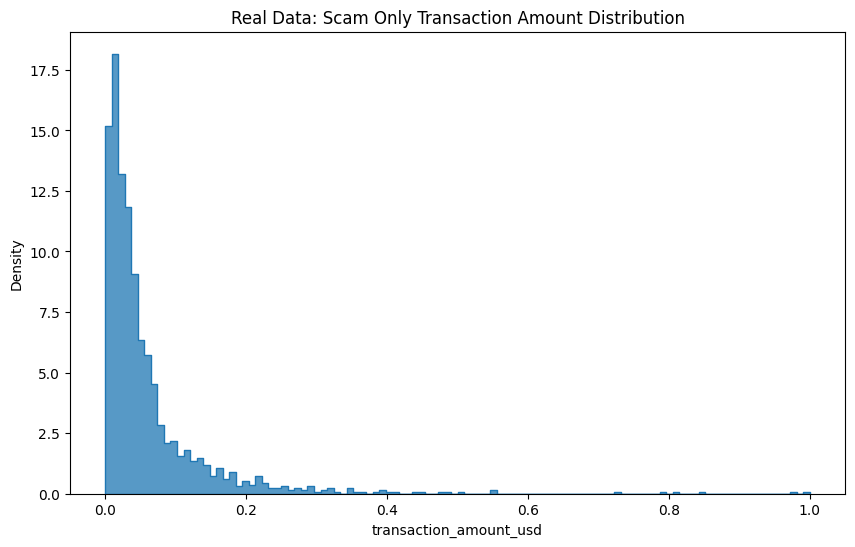

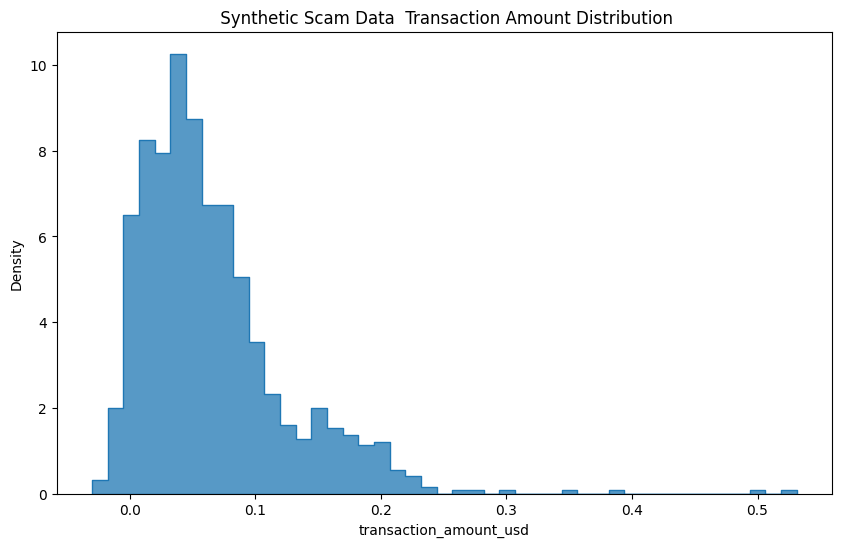

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='transaction_amount_usd', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='transaction_amount_usd', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data  Transaction Amount Distribution')
plt.show()

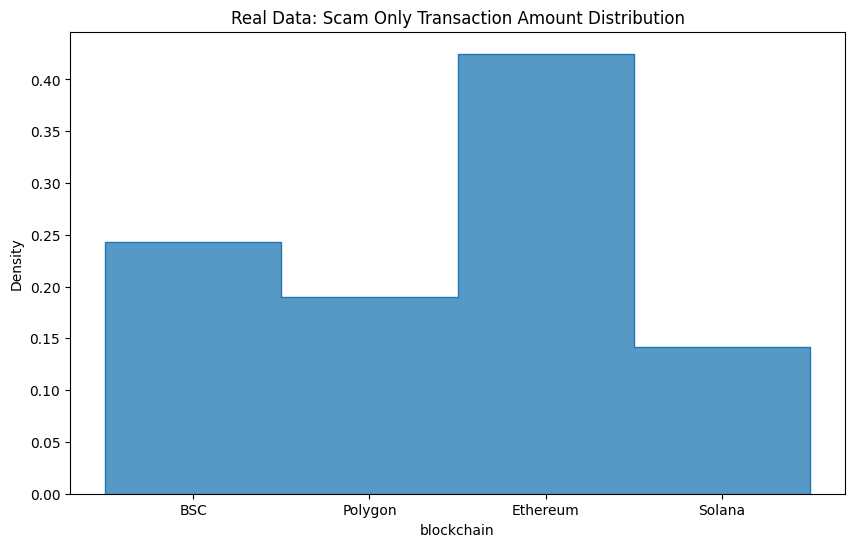

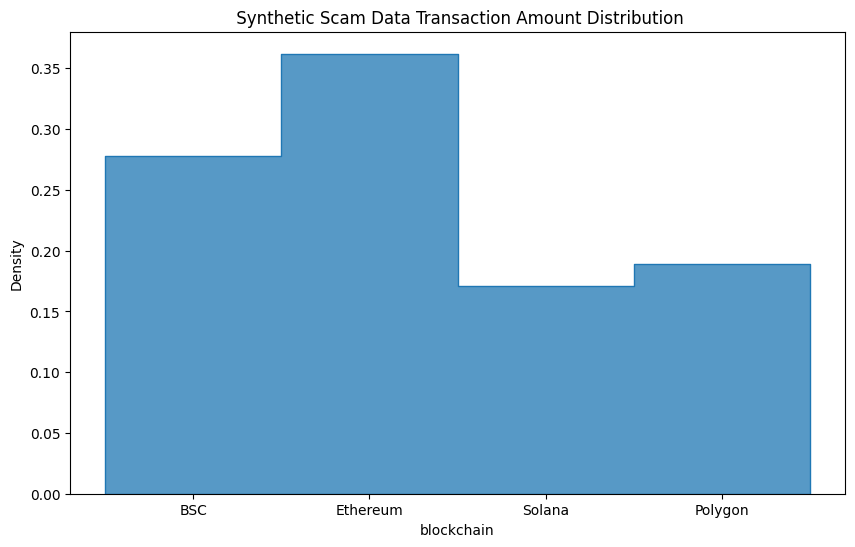

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='blockchain', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='blockchain', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

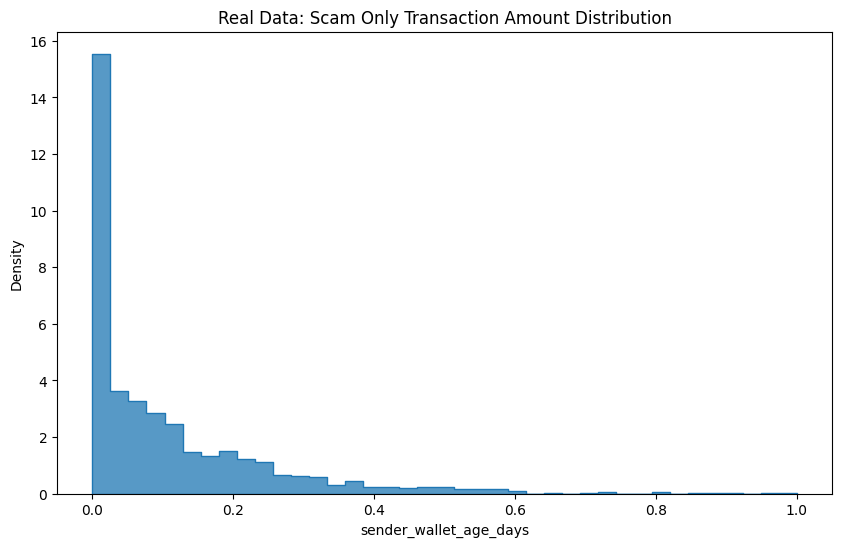

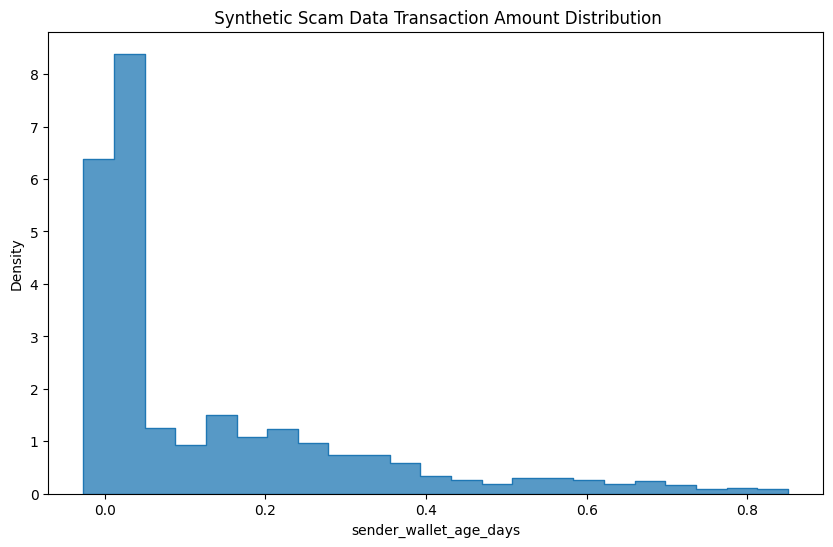

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sender_wallet_age_days', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='sender_wallet_age_days', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

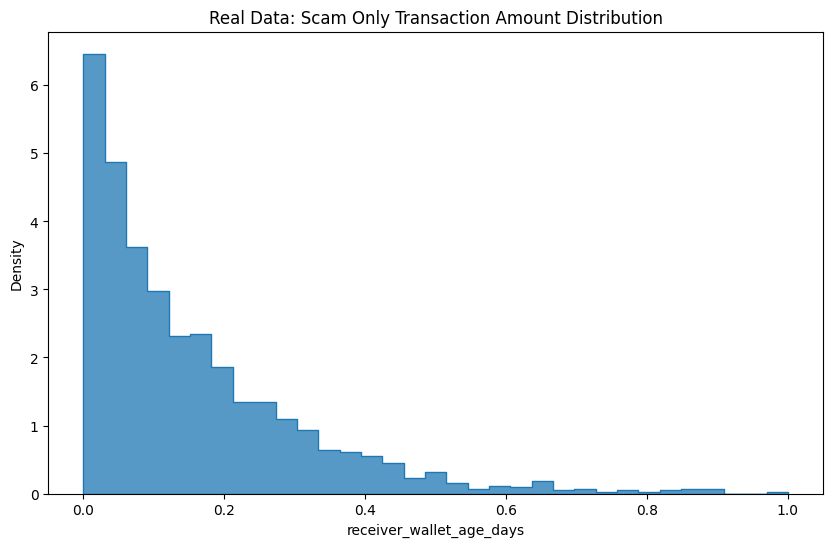

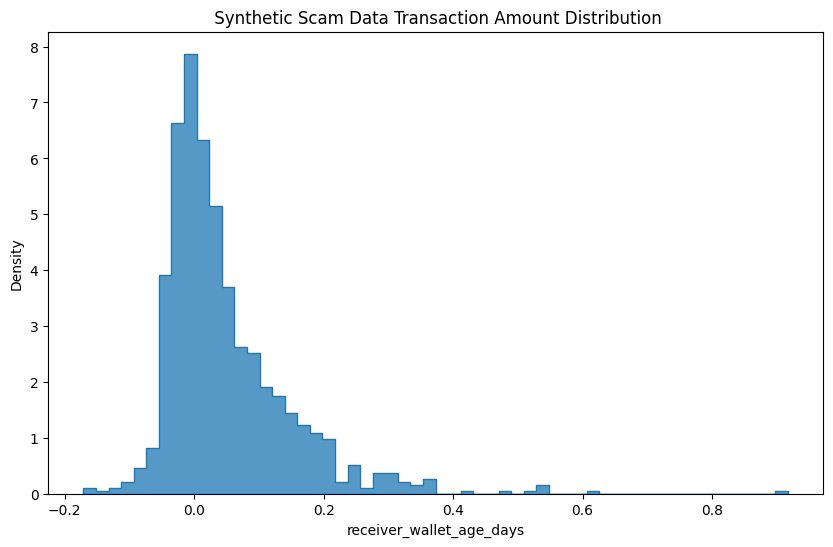

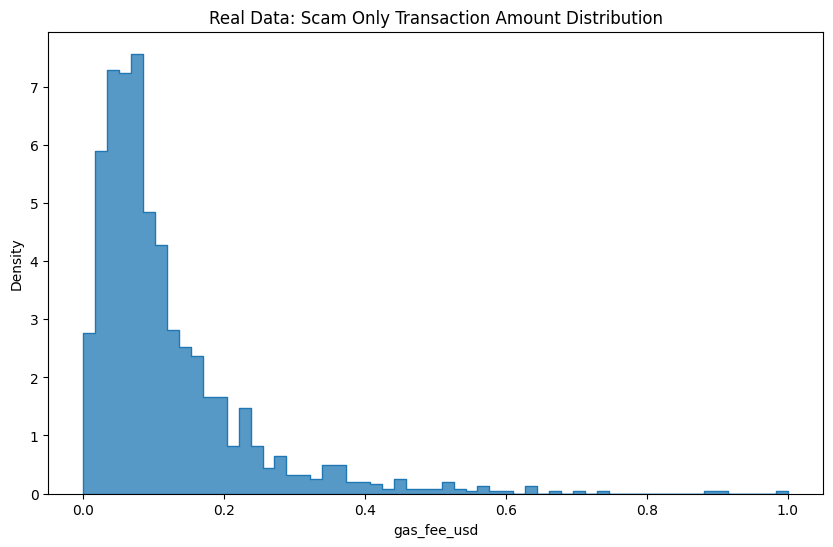

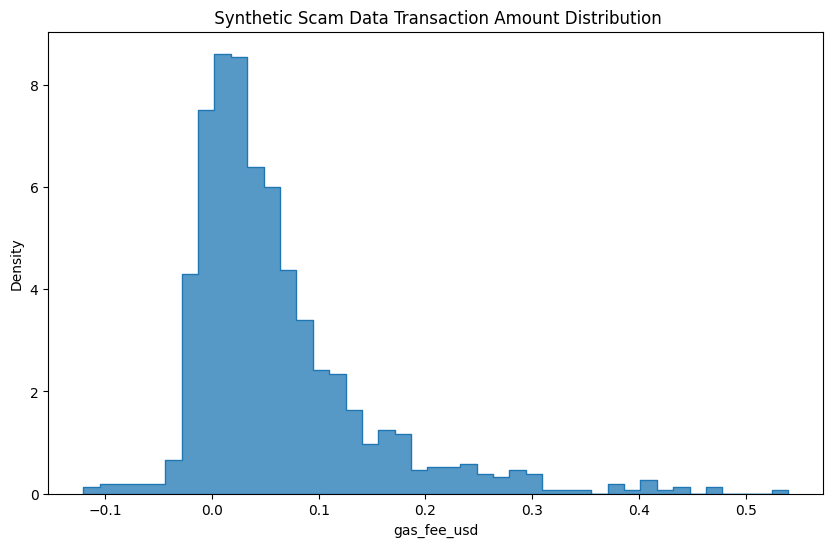

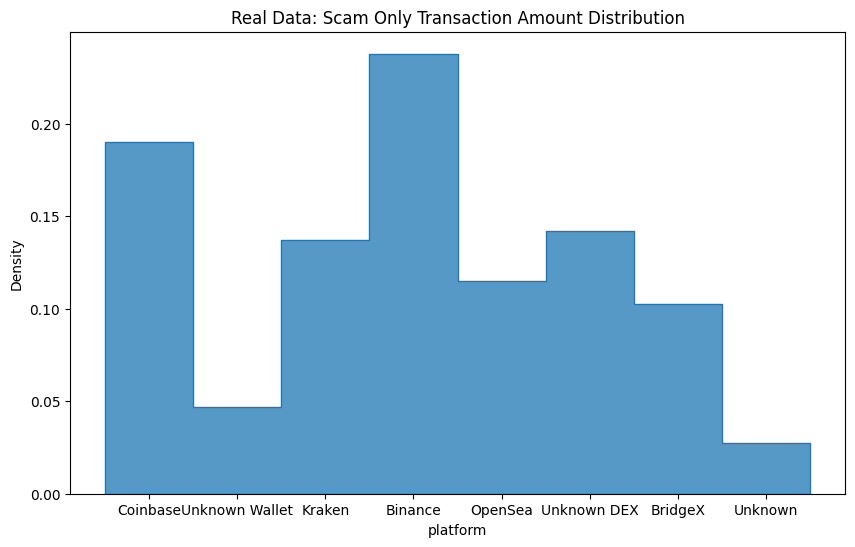

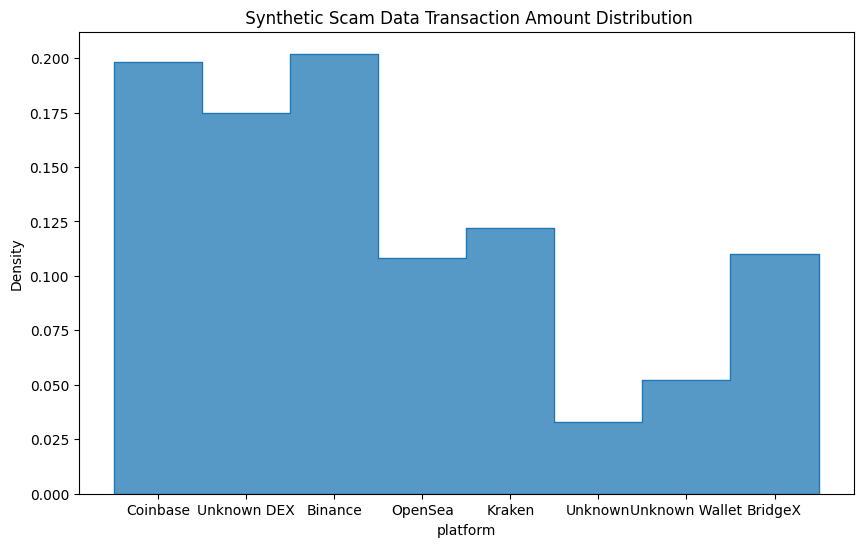

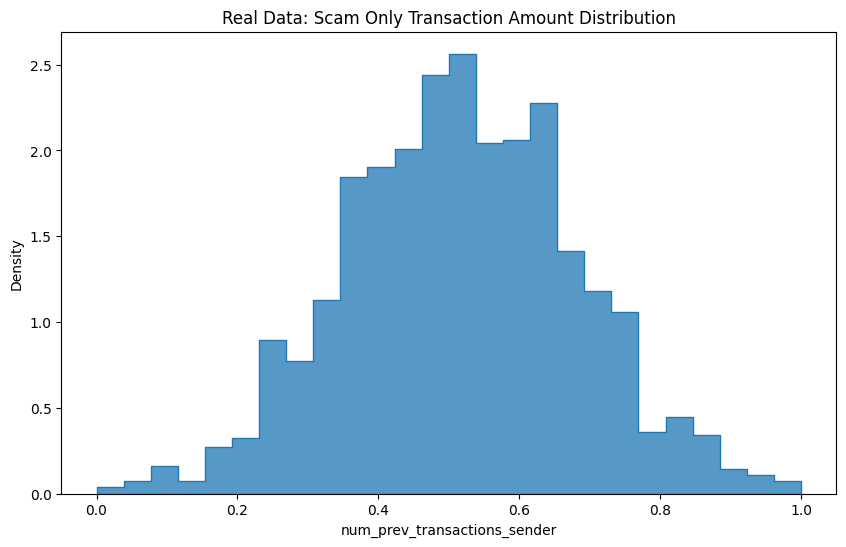

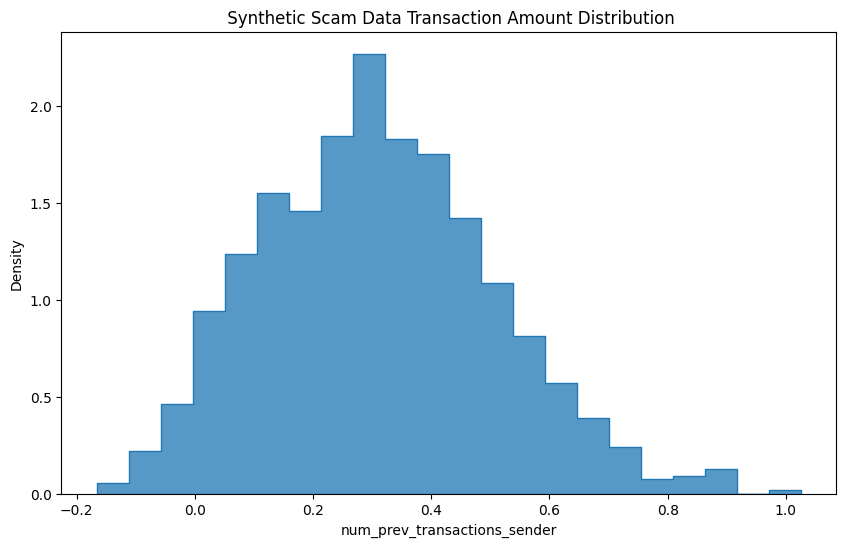

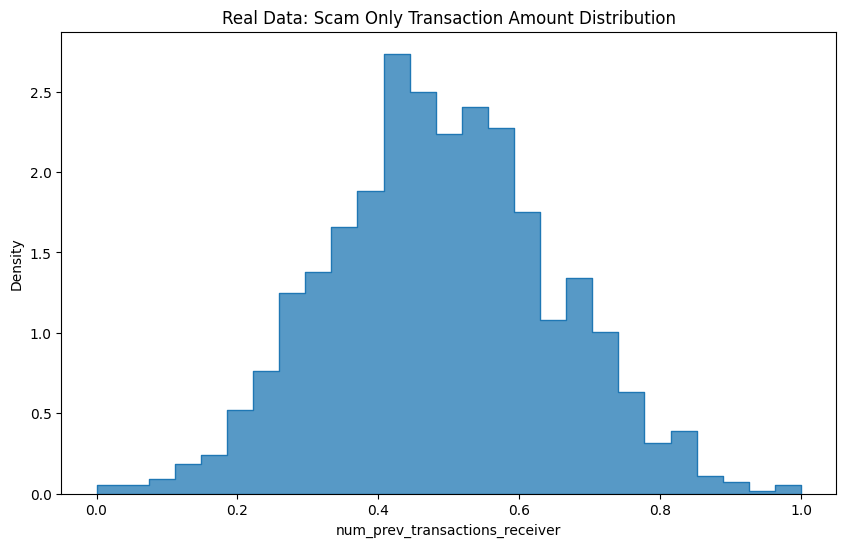

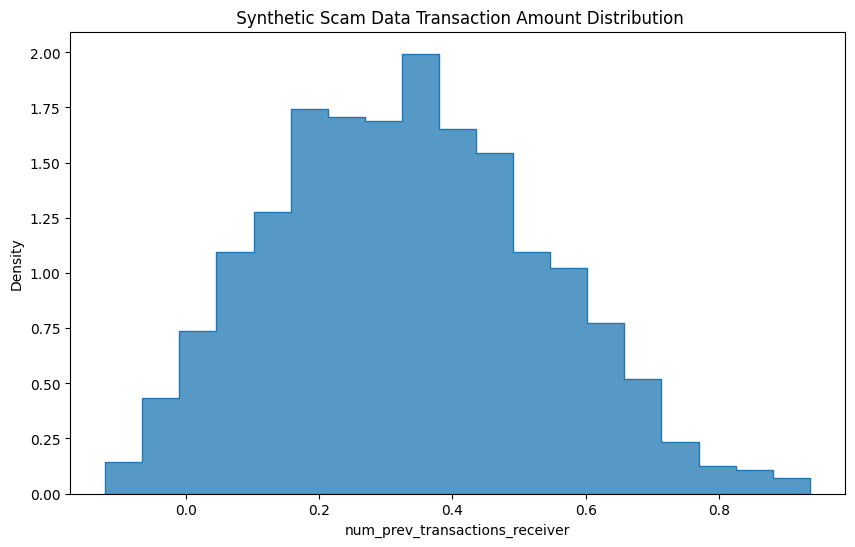

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='receiver_wallet_age_days', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='receiver_wallet_age_days', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='gas_fee_usd', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='gas_fee_usd', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='platform', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='platform', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_prev_transactions_sender', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='num_prev_transactions_sender', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_prev_transactions_receiver', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='num_prev_transactions_receiver', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

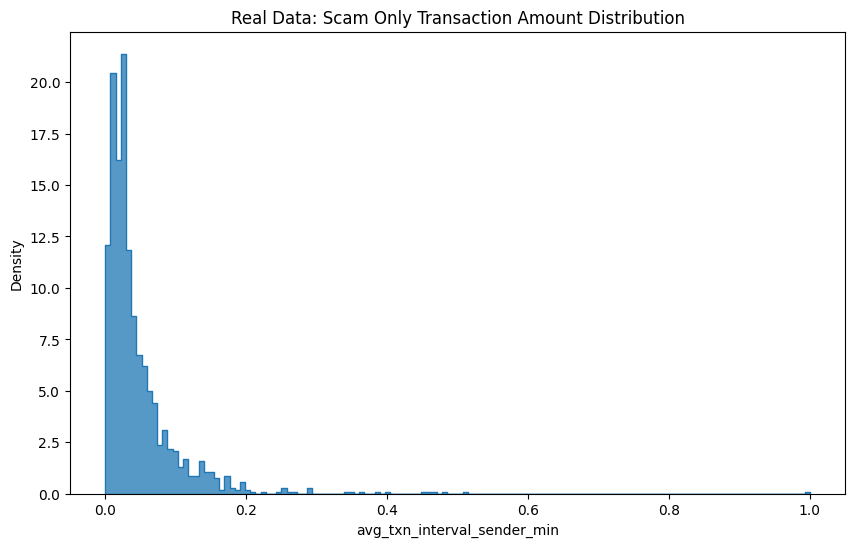

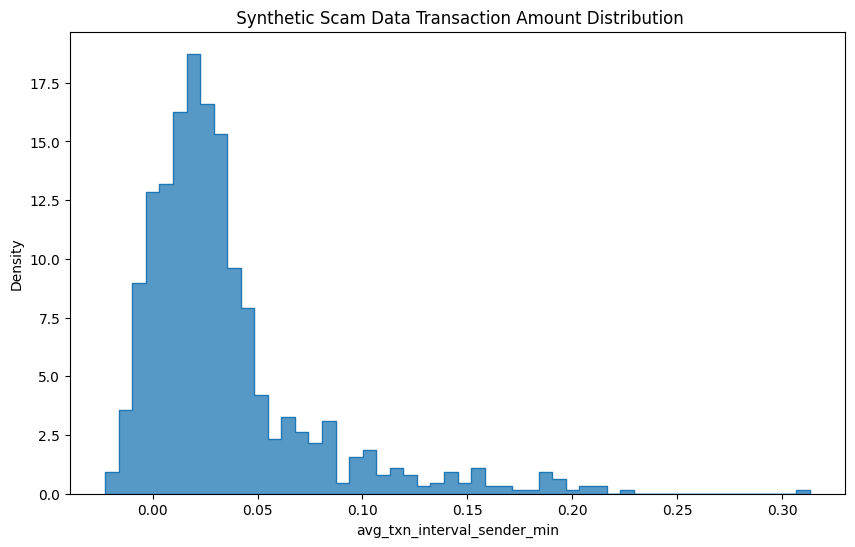

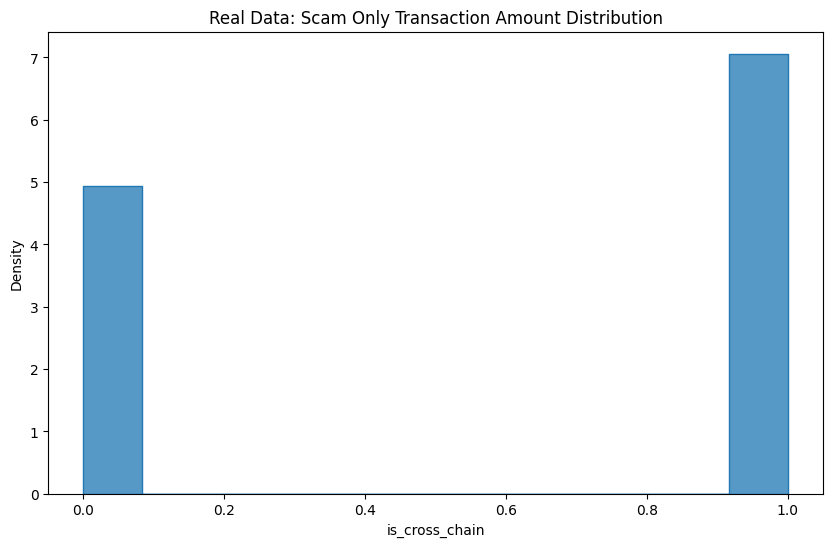

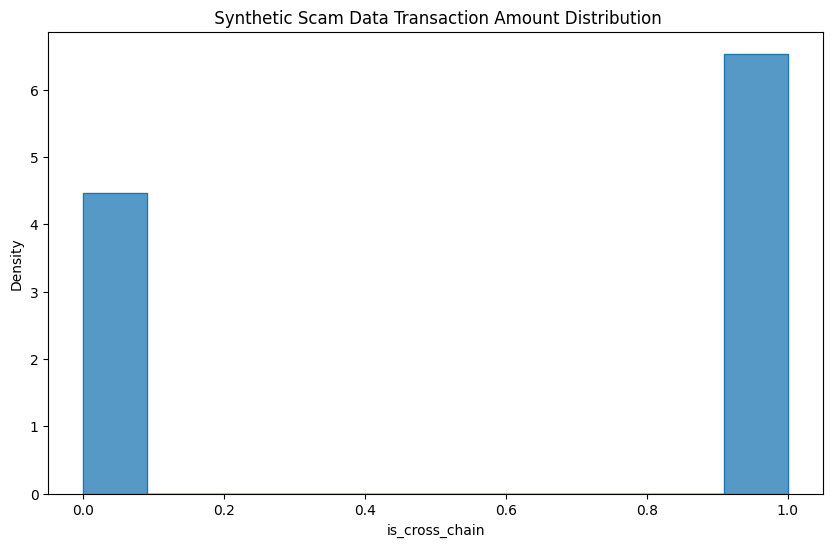

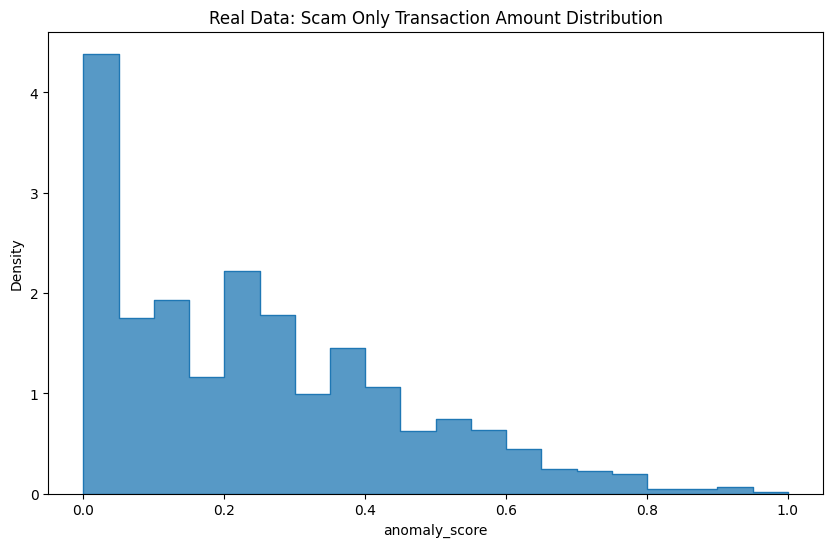

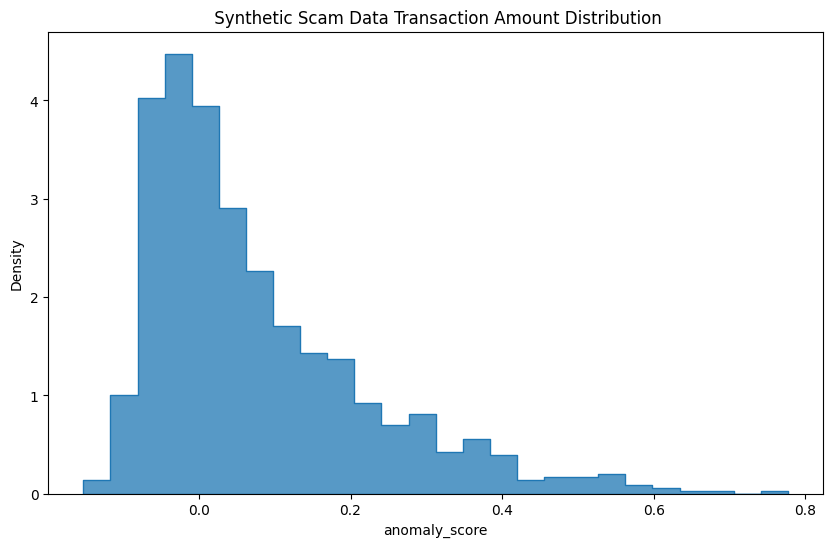

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_txn_interval_sender_min', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='avg_txn_interval_sender_min', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='is_cross_chain', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='is_cross_chain', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='anomaly_score', element='step', stat='density', common_norm=False)
plt.title('Real Data: Scam Only Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_scam_data, x='anomaly_score', element='step', stat='density', common_norm=False)
plt.title(' Synthetic Scam Data Transaction Amount Distribution')
plt.show()

## 5. Combine & Validate

In [63]:
# Inverse transform the numerical columns for both real and synthetic data validation
real_data_rescaled = df.copy()
real_data_rescaled[numerical_features] = scaler.inverse_transform(real_data_rescaled[numerical_features])

synthetic_scam_rescaled = synthetic_scam_data.copy()
synthetic_scam_rescaled[numerical_features] = scaler.inverse_transform(synthetic_scam_rescaled[numerical_features])


In [64]:
#Combine real non-scam + synthetic scam data
real_non_scam = o_df
final_dataset = pd.concat([real_non_scam, synthetic_scam_rescaled], axis=0)

# Shuffle dataset
final_dataset = final_dataset.sample(frac=1).reset_index(drop=True)

print("Final Dataset Shape:", final_dataset.shape)
print("Class Distribution:\n", final_dataset['is_scam'].value_counts())

Final Dataset Shape: (21000, 21)
Class Distribution:
 is_scam
0    18550
1     2450
Name: count, dtype: int64


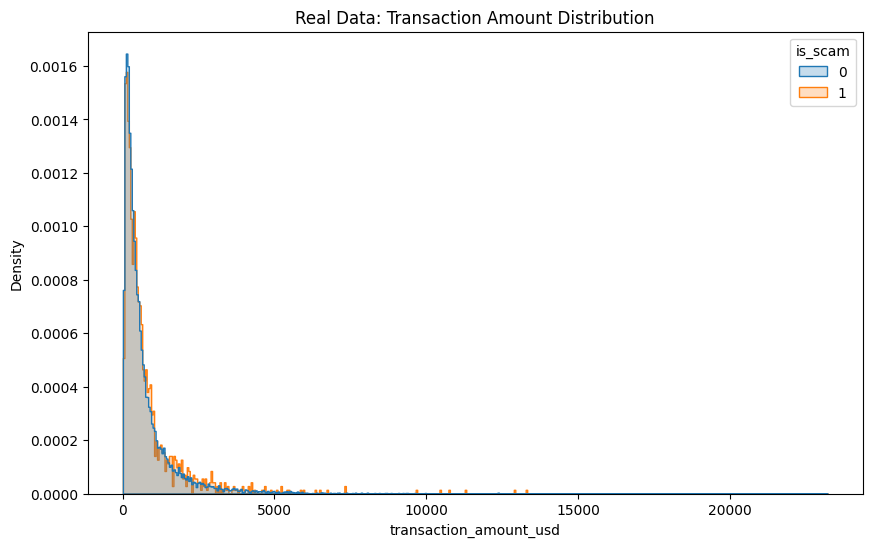

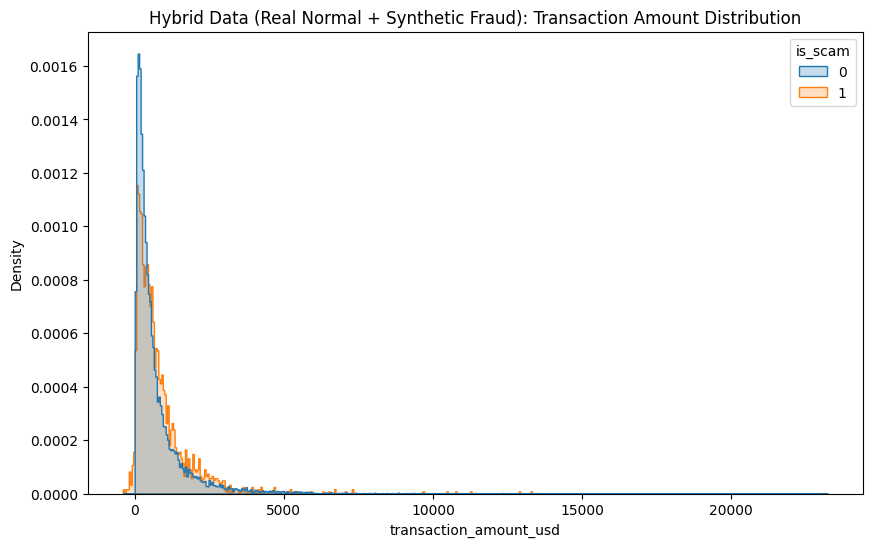

In [65]:
# Validate distributions (optional visualization)
plt.figure(figsize=(10, 6))
sns.histplot(data=o_df, x='transaction_amount_usd', hue='is_scam', element='step', stat='density', common_norm=False)
plt.title('Real Data: Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=final_dataset, x='transaction_amount_usd', hue='is_scam', element='step', stat='density', common_norm=False)
plt.title('Hybrid Data (Real Normal + Synthetic Fraud): Transaction Amount Distribution')
plt.show()

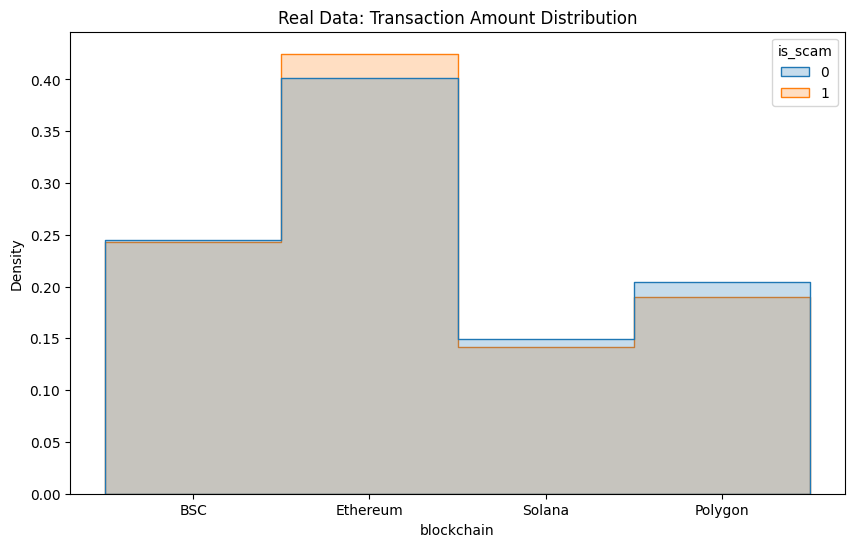

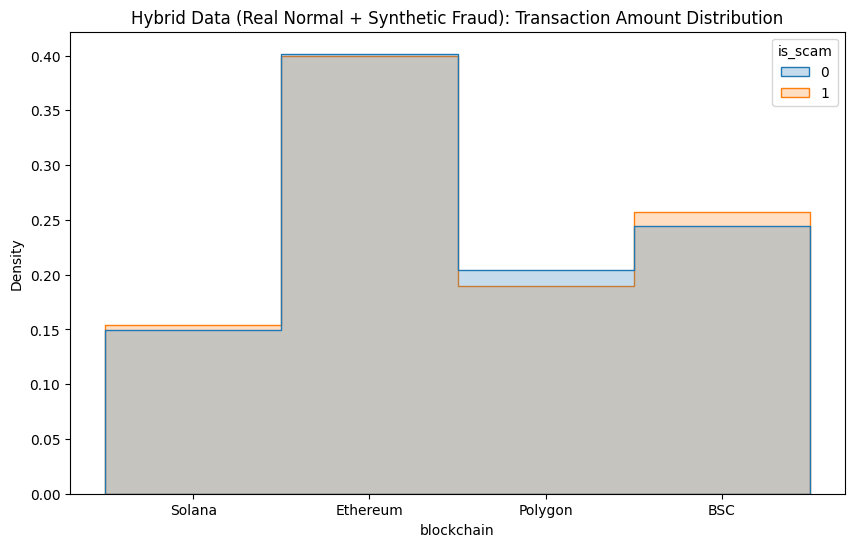

In [67]:
# Validate distributions (optional visualization)
plt.figure(figsize=(10, 6))
sns.histplot(data=o_df, x='blockchain', hue='is_scam', element='step', stat='density', common_norm=False)
plt.title('Real Data: Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=final_dataset, x='blockchain', hue='is_scam', element='step', stat='density', common_norm=False)
plt.title('Hybrid Data (Real Normal + Synthetic Fraud): Transaction Amount Distribution')
plt.show()

In [66]:
# Save final fraud dataset
final_dataset.to_csv('synthetic_fraud_dataset.csv', index=False)
print("Saved final dataset to 'synthetic_fraud_dataset.csv'")

Saved final dataset to 'synthetic_fraud_dataset.csv'


Dataset is Ready